In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [161]:
pd.set_option('display.max_columns', None)

# Temperature Forecast Project using ML

**Problem Statement:** I will be predicting next day's Max and Min Temperature based on the attribute values.

**Data Set Information:**

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

**Attribute Information:**

1. station - used weather station number: 1 to 25
2. Date: yyyy-mm-dd ('2013-06-30' to '2017-08-30')<font color="red">
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPSTmaxlapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPSTminlapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9</font><font color="Green">
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T</font>

<font color="red">Red</font> ones are the **Predictors** and <font color="green">Green</font> ones are the **Target**.

# Load Data

In [111]:
df1 = pd.read_csv("temp.csv")
df_temp = df1.copy()
df_temp.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### Checking the shape of the dataframe.

In [112]:
df_temp.shape

(7752, 25)

### DataTypes for all the columns

In [113]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


This information shows all variables are of continious category apart from the Date which is good.

# Data Cleaning

#### Below we are checking for null values in our DataSet

In [114]:
df_temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [115]:
df_temp = df_temp[df_temp["Date"].notna()]

Removed 2 rows as they were missing Date and station and would create problem as our data is based on date.

As we have lot of variables with missing values we will have to treat them. As part of this process we will use the method of imputation. Replacing null values with mean of that columns.

In [116]:
df_temp.fillna(value = df_temp[df_temp.iloc[:,2:18].columns].mean(), inplace = True)

In [117]:
df_temp.isnull().sum()

station              0
Date                 0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Exploring Data

#### Visualizing the columns for analysis

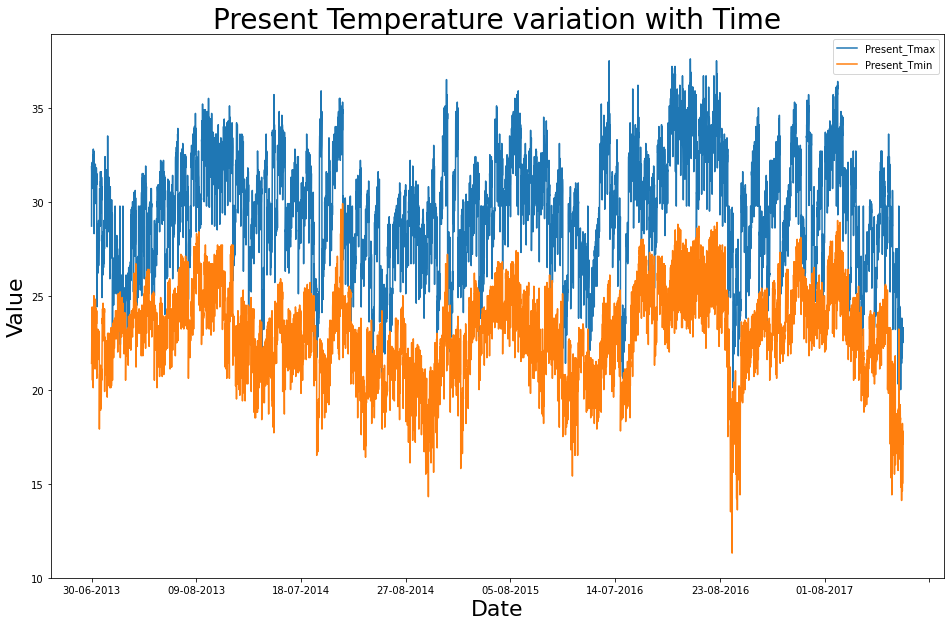

In [118]:
df_temp.plot(x = "Date", y = ["Present_Tmax", "Present_Tmin"], figsize = (16,10))
plt.xlabel("Date", fontsize = 22)
plt.ylabel("Value", fontsize = 22)
plt.title("Present Temperature variation with Time", fontsize = 28)
plt.show()

The plot helps us to visualize the temperature variation on each day for maximum temprature and minimum temprature.

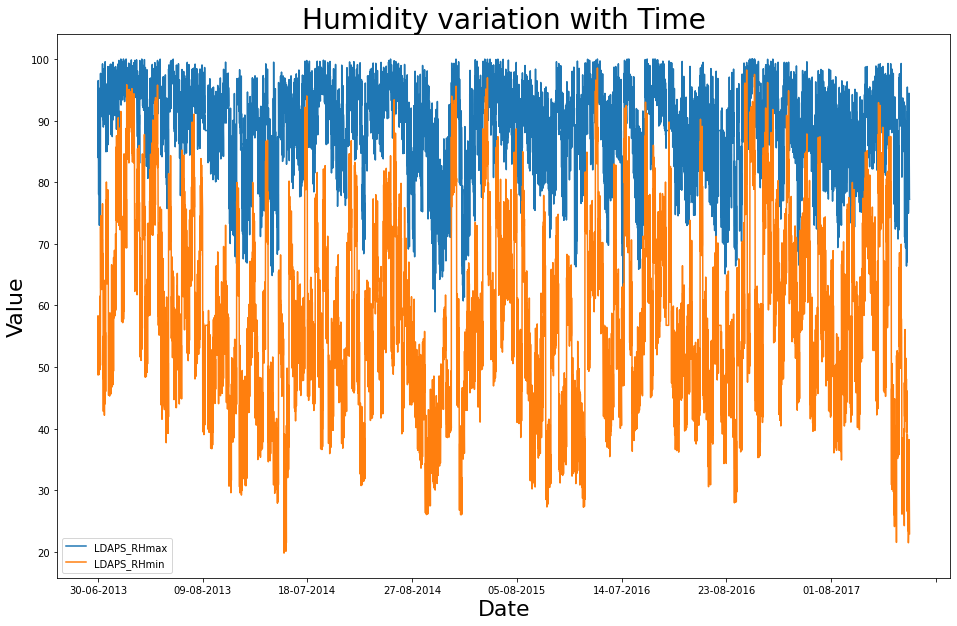

In [119]:
df_temp.plot(x = "Date", y = ["LDAPS_RHmax","LDAPS_RHmin"], figsize = (16,10))
plt.xlabel("Date", fontsize = 22)
plt.ylabel("Value", fontsize = 22)
plt.title("Humidity variation with Time", fontsize = 28)
plt.show()

The plot helps us to visualize the humidity variation on each day in the dataset.

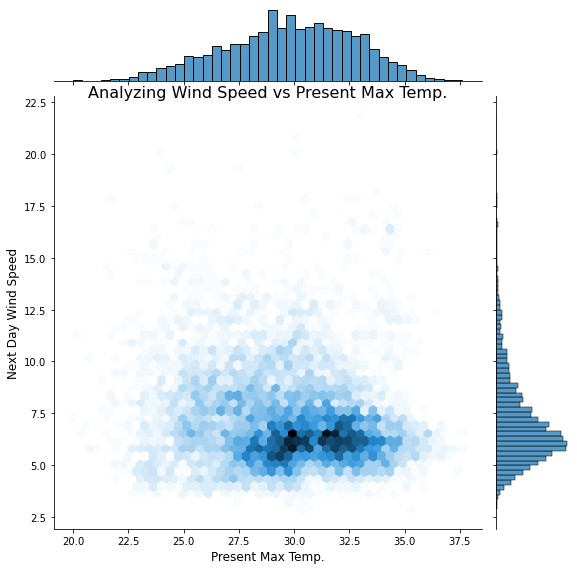

In [120]:
sns.jointplot(data = df_temp, x = "Present_Tmax", y = "LDAPS_WS", kind = "hex", height = 8)
plt.xlabel("Present Max Temp.", fontsize = 12)
plt.ylabel("Next Day Wind Speed", fontsize = 12)
plt.title("Analyzing Wind Speed vs Present Max Temp.", y = 1.0, pad = -1.4, fontsize = 16)
plt.show()

In [121]:
ws_tl_30 = round((df_temp[(df_temp["LDAPS_WS"] >= 7.5) & (df_temp["Present_Tmax"] <= 27.5)].count()[0] / \
              df_temp.count()[0]) * 100,2)

print(f"""This indicates the percentage of observations when wind speed is higher then 7.5 and 
Temp is lower then 27.5 degrees: {ws_tl_30}%""")

This indicates the percentage of observations when wind speed is higher then 7.5 and 
Temp is lower then 27.5 degrees: 10.7%


In [122]:
ws_tg_30 = round((df_temp[(df_temp["LDAPS_WS"] >= 7.5) & (df_temp["Present_Tmax"] > 27.5)].count()[0] / \
                  df_temp.count()[0]) * 100,2)

print(f"""This indicates the percentage of observations when wind speed is higher then 7.5 and 
Temp is greater then 27.5 degrees: {ws_tg_30}%""")

This indicates the percentage of observations when wind speed is higher then 7.5 and 
Temp is greater then 27.5 degrees: 20.98%


The above plot is to visualize the relation between Max Temp. and Wind Speed. How different wind speeds affects the  day's temperature. We can visually see there is a huge concentration for wind speed and max temp. between 5 to 7.5.

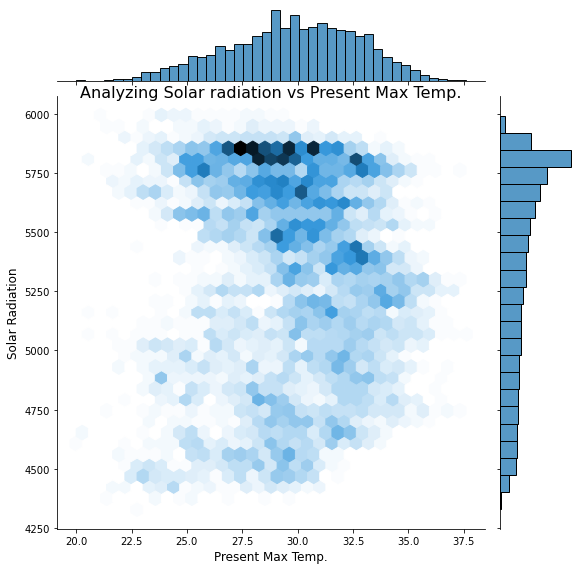

In [123]:
sns.jointplot(data = df_temp, x = "Present_Tmax", y = "Solar radiation", kind = "hex", height = 8)
plt.xlabel("Present Max Temp.", fontsize = 12)
plt.ylabel("Solar Radiation", fontsize = 12)
plt.title("Analyzing Solar radiation vs Present Max Temp.", y = 1.0, pad = -1.4, fontsize = 16)
plt.show()

The above plot is to visualize the relation between present Max Temp. and present Solar radiation. How different levels of solar radiation affects the day's temperature. We can visually see there is a huge concentration for solar radiation and max temp. between 5750 & above level of solar radiations to 6000.

In [124]:
sr_tl_30 = round((df_temp[(df_temp["Solar radiation"] > 5250) & (df_temp["Present_Tmax"] < 27.5)].count()[0] / \
                  df_temp.count()[0]) * 100,2)

print(f"""This indicates the percentage of observations when solar radiation is lower then 5250 and 
Temp is less then 27.5 degrees: {sr_tl_30}%""")

This indicates the percentage of observations when solar radiation is lower then 5250 and 
Temp is less then 27.5 degrees: 13.11%


In [125]:
sr_tg_30 = round((df_temp[(df_temp["Solar radiation"] > 5250) & (df_temp["Present_Tmax"] > 27.5)].count()[0] / \
                  df_temp.count()[0]) * 100,2)

print(f"""This indicates the percentage of observations when solar radiation is greater then 5250 and 
Temp is greater then 27.5 degrees: {sr_tg_30}%""")

This indicates the percentage of observations when solar radiation is greater then 5250 and 
Temp is greater then 27.5 degrees: 47.91%


We do see some correlaition between wind speed and solar radiation with day's max temp. We will analyze some more features to get a better understanding.

# Feature Selection & Engineer

1. As we are going to do prediction for a single day I will feature enginner my cloud cover and precipitation columns to average cloud cover and average precipitation level for that day.
2. We will also remove the Next Max and Next Min as they are predicted values from the dataset.
3. We will add 2 columns actual next day max and actual next day min to see correlation between other features and those values.

In [126]:
df_temp["Avg CC"] = df_temp[["LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4"]].T.mean()
df_temp["Avg PL"] = df_temp[["LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]].T.mean()
df_temp = df_temp.drop(["LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1",\
                        "LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","Next_Tmax","Next_Tmin"], axis = 1)

In [157]:
df_temp["Actual Max"] = df_temp["Present_Tmax"].shift(-1)
df_temp["Actual Min"] = df_temp["Present_Tmin"].shift(-1)
df_temp.iloc[7749:,18:] = np.array(df_temp.iloc[7748:,18:])[0][0]
df_temp.iloc[7749:,17:18] = np.array(df_temp.iloc[7748:,17:18])[0][0]

In [158]:
df_temp.tail(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation,Avg CC,Avg PL,Actual Max,Actual Min
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,37.5372,126.891,15.5876,0.1554,4443.313965,0.027767,0.0,23.3,17.7
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,37.5237,126.909,17.2956,0.2223,4438.373535,0.027709,0.0,23.2,17.4
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,37.5237,126.970,19.5844,0.2713,4451.345215,0.027405,0.0,23.2,17.4


The above dataset is more clean and precise as we have consolidated our cloud cover and precipitation level columns in 2.

### Correlation Matrix

We are dropping Date column as it is not needed for correlation neither is needed for prediction.

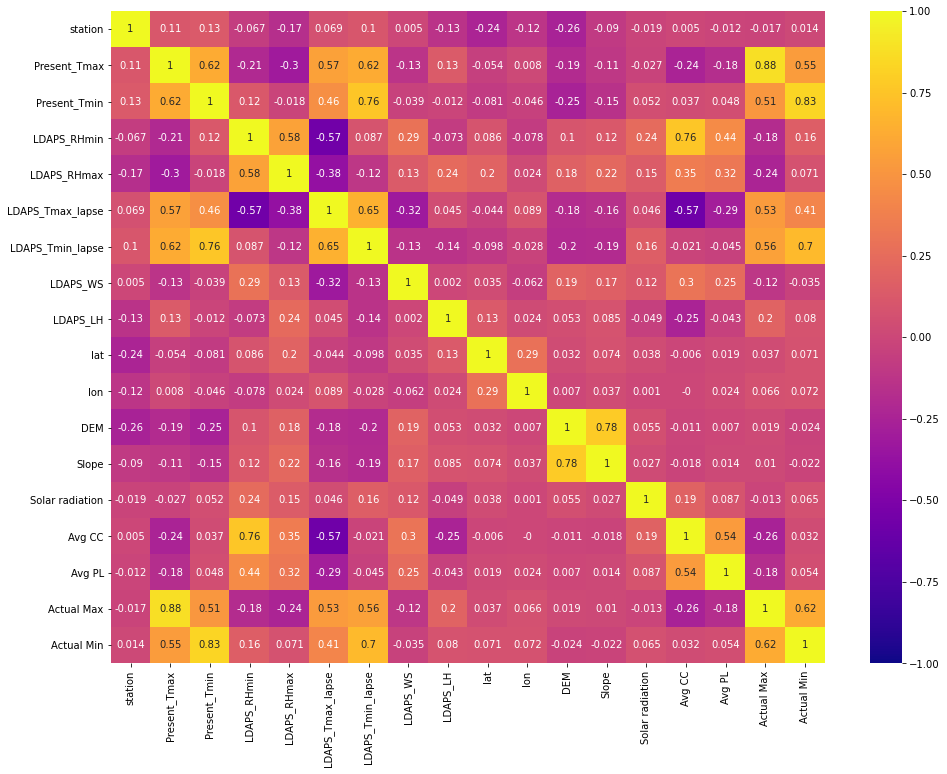

In [186]:
df2 = df_temp.drop(['Date'], axis = 1)
plt.figure(figsize = [16,12])
sns.heatmap(round(df2.corr(),3), vmin = -1, vmax = 1, cmap = "plasma",linecolor = "green", annot = True)
plt.show()

In the plot we can see high correlation between some of the features. We have 4 engineered features here which would be useful in our final prediction model.

1. The variables with notable correlation with Actual Max and Actual Min are present_max, present_min which is understandable as we have a hot day today chances of a hot day tomorrow is higher then it being a cool day and the few chances of cooler day then today can also be percieved by looking at the average cloud cover and average precipitation level, as this have a negative correlation with our target variable.
2. We also have a notable correlation between Actual Max and Actual Min with LDAPS_Tmax_lapse(Next day Max Air temp.) & LDAPS_Tmin_lapse (Next day Min Air temp.), which would definetly affect our next day's temperature.

# Training and Testing

## Linear Regression

### Predicting Next Day's Max and Min temperature with all features

In [222]:
def linn_regg(x_train_lr, x_test_lr, y_train_lr, y_test_lr):    
    lin_reg = LinearRegression ( fit_intercept = True )
    lin_reg.fit(x_train_lr , y_train_lr)
    
    predict_lr = lin_reg.predict(x_test_lr)
    
    return predict_lr

In [238]:
x_split = df2.iloc[:,:16]
y_max_split = df2["Actual Max"]
y_min_split = df2["Actual Min"]


x_train, x_test, y_max_train, y_max_test = train_test_split(x_split, y_max_split, test_size = 0.3, random_state = 5)
x_train, x_test, y_min_train, y_min_test = train_test_split(x_split, y_min_split, test_size = 0.3, random_state = 5)


predict_max_lr = linn_regg(x_train, x_test, y_max_train, y_max_test)
predict_min_lr = linn_regg(x_train, x_test, y_min_train, y_min_test)


rmse_Nmax = mean_squared_error(y_max_test, predict_max_lr, squared=False)
rmse_Nmin = mean_squared_error(y_min_test, predict_min_lr, squared=False)

In [239]:
print(f"""
I have calculated the Root Mean Squared error for my regression model. Below are the error results.
RMSE for Next Day's Max temperature: {rmse_Nmax:.2f}
RMSE for Next Day's Min temperature: {rmse_Nmin:.2f}
""")


I have calculated the Root Mean Squared error for my regression model. Below are the error results.
RMSE for Next Day's Max temperature: 1.23
RMSE for Next Day's Min temperature: 1.10



### Predicting Next Day's Max and Min using Feature ranking with recursive feature elimination

In [256]:
x_f = df2.iloc[:,:16]
y_f = df2.iloc[:,16:]

rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
# fit RFE
rfe.fit(x_f, y_f)
# summarize all features
for i in range(x_f.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 3.000
Column: 9, Selected False, Rank: 6.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 4.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 7.000


In [257]:
df2[x_f.columns[rfe.support_]].head(5)

,station,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,lon,DEM,Solar radiation,Avg CC
0,1.0,28.7,21.4,28.074101,23.006936,6.818887,126.991,212.3350,5992.895996,0.182617
1,2.0,31.9,21.6,29.850689,24.035009,5.691890,127.032,44.7624,5869.312500,0.191113
2,3.0,31.6,23.3,30.091292,24.565633,6.138224,127.058,33.3068,5863.555664,0.203257
3,4.0,32.0,23.4,29.704629,23.326177,5.650050,127.022,45.7160,5856.964844,0.184445
4,5.0,31.4,21.9,29.113934,23.486480,5.735004,127.135,35.0380,5859.552246,0.187579


In [258]:
x_split_f = df2[x_f.columns[rfe.support_]]

x_train_f, x_test_f, y_max_train_f, y_max_test_f = \
train_test_split(x_split_f, y_max_split, test_size = 0.3, random_state = 5)

x_train_f, x_test_f, y_min_train_f, y_min_test_f = \
train_test_split(x_split_f, y_min_split, test_size = 0.3, random_state = 5)


predict_max_lr_f = linn_regg(x_train_f, x_test_f, y_max_train_f, y_max_test_f)
predict_min_lr_f = linn_regg(x_train_f, x_test_f, y_min_train_f, y_min_test_f)


rmse_Nmax_f = mean_squared_error(y_max_test_f, predict_max_lr_f, squared=False)
rmse_Nmin_f = mean_squared_error(y_min_test_f, predict_min_lr_f, squared=False)

In [259]:
print(f"""
I have calculated the Root Mean Squared error for my regression model. Below are the error results.
RMSE for Next Day's Max temperature: {rmse_Nmax_f:.2f}
RMSE for Next Day's Min temperature: {rmse_Nmin_f:.2f}
""")


I have calculated the Root Mean Squared error for my regression model. Below are the error results.
RMSE for Next Day's Max temperature: 1.27
RMSE for Next Day's Min temperature: 1.16

